<a href="https://colab.research.google.com/github/sdlm/pytorch_mnist/blob/master/keras_circles_experiment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [0]:
DIAMETER = 4
IMG_SIZE = 50
MARGIN = 6
TRAIN_COUNT = 1000
TEST_COUNT = 100
EPOCHS_COUNT = 5

In [0]:
def generate_image(x: int, y: int) -> Image:
    image = Image.new('L', (IMG_SIZE, IMG_SIZE))
    draw = ImageDraw.Draw(image)
    draw.rectangle([(0, 0), image.size], fill='black')
    coords = (x, y, x + DIAMETER, y + DIAMETER)
    draw.ellipse(coords, fill='white')
    return image


def generate_dataset(count: int):
    max_coord = IMG_SIZE - 2 * MARGIN
    x_arr = MARGIN + np.random.randint(max_coord, size=count)
    y_arr = MARGIN + np.random.randint(max_coord, size=count)
    images = [
        generate_image(x_arr[i], y_arr[i])
        for i in range(count)
    ]
    arr = np.array([
        np.array(im)
        for im in images
    ])
    x_center = x_arr + DIAMETER / 2
    return arr, x_center

In [0]:
x_train, y_train = generate_dataset(TRAIN_COUNT)
x_test, y_test = generate_dataset(TEST_COUNT)

In [395]:
x_train.shape, y_train.shape

((1000, 50, 50), (1000,))

In [0]:
shape = x_train.shape
x_train = x_train.reshape(shape[0], shape[1], shape[2], 1)

In [0]:
shape = x_test.shape
x_test = x_test.reshape(shape[0], shape[1], shape[2], 1)

In [0]:
# shape = train_images.shape
# train_images = train_images.reshape(shape[0], shape[1] * shape[2])
# train_images = train_images.astype('float32') / 255

# shape = test_images.shape
# test_images = test_images.reshape(shape[0], shape[1] * shape[2])
# test_images = test_images.astype('float32') / 255

In [399]:
x_train.shape[1:]

(50, 50, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

In [0]:
# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(40000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [0]:
# optimizers.SGD(lr=1e-4, momentum=0.8, decay=1e-6)
# optimizers.rmsprop(lr=0.001, decay=1e-6)
model.compile(optimizer=optimizers.SGD(lr=1e-5, momentum=0.5, decay=1e-8),
                 loss='mse',
                 metrics=['mae'])

In [404]:
history = model.fit(x_train, y_train, epochs=EPOCHS_COUNT, batch_size=128)

Epoch 1/5
1000/1000 [==============================] - 13s 13ms/step - loss: 483.3793 - mean_absolute_error: 17.9843
Epoch 2/5
1000/1000 [==============================] - 11s 11ms/step - loss: 82.2489 - mean_absolute_error: 7.0431
Epoch 3/5
1000/1000 [==============================] - 11s 11ms/step - loss: 62.4836 - mean_absolute_error: 6.2321
Epoch 4/5
1000/1000 [==============================] - 11s 11ms/step - loss: 59.0148 - mean_absolute_error: 5.9763
Epoch 5/5
1000/1000 [==============================] - 11s 11ms/step - loss: 54.7991 - mean_absolute_error: 5.8435


In [405]:
model.evaluate(x_test, y_test)

100/100 [==============================] - 1s 9ms/step


[6.766364364624024, 1.9609294509887696]

In [406]:
model.predict(x_test)[:5]

array([[ 5.4653993],
       [14.373097 ],
       [19.191103 ],
       [21.811525 ],
       [42.79171  ]], dtype=float32)

In [407]:
y_test[:5]

array([ 8., 15., 20., 23., 40.])

In [408]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

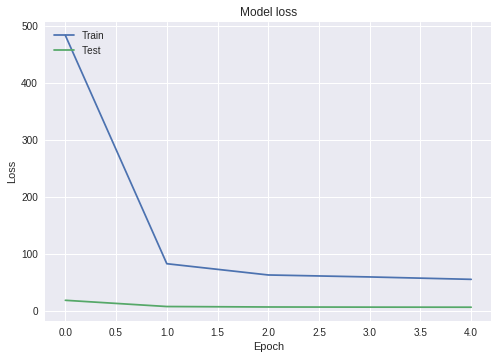

In [409]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()